## English Premier League 2017/2018 data analysis 

The dataset is taken from https://www.kaggle.com/mauryashubham/english-premier-league-players-dataset/data. In this notebook, I will use the data to select top 11 players for my fantasy premier league.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import os
files = os.listdir(os.curdir)        
print(files)                             #looking inside the current directory

['.ipynb_checkpoints', 'EPL.ipynb', 'epldata_final.csv']


In [15]:
df=pd.read_csv('epldata_final.csv')
df.index=df.index+1                     # indexing start with 1

In [17]:
df.head()                               # data set sample

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
1,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
2,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
3,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
4,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
5,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


$ \textbf{Data Visualization}$

First Let's make some plots to visualize the data.

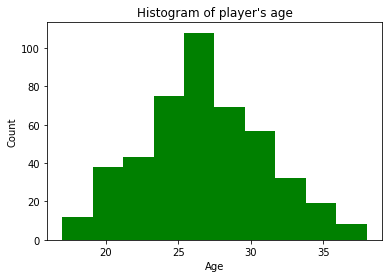

26.804772234273319

In [84]:
plt.hist(df['age'],facecolor='g')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of player\'s age')
plt.show()
df['age'].mean()

As seen from histogram above and explicit caluclation, the average age of premier league player is ~27. It
would be quite interesting to see how this average number has changed over time but that will require more data. But what we can do is see how the average age corresponds to the current ranging of the club.

In [89]:
df[lambda df: df['club']=='Arsenal']['age'].mean()

26.678571428571427

In [214]:
def types(array):      #finds different objects within an array
    newarray=[]
    for a in range(len(array)):
        if array[a] not in newarray:
            newarray.append(array[a])
    return newarray

newarray=[]

for a in types(np.asarray(df['club'])):
    newarray.append([a,df[lambda df: df['club']==a]['age'].mean()])

newarray=sorted(newarray, key=lambda x: x[1])

df_avg_age=pd.DataFrame(newarray,columns=['club','average age'])
df_avg_age.index=df_avg_age.index+1  

In [215]:
df_avg_age

,club,average age
1,Liverpool,24.777778
2,Southampton,24.956522
3,Manchester+United,25.560000
4,Tottenham,25.650000
5,Huddersfield,26.000000
6,Everton,26.214286
7,Newcastle+United,26.428571
8,Arsenal,26.678571
9,Bournemouth,26.875000
10,Manchester+City,27.000000


Average age doesnt seem like a good indication for clubs current standing